# GRUPO 6 TP2 PARTE 2 MODELOS DE REGRESION


- Laura Andrea Martínez Cardona
- Rafael Eduardo Figueredo Oropeza


In [1]:
# NOTA: Se debe ejecutar el archivo Grupo6_TP2_data_cleaning para generar el archivo df_caba.csv


#importar librerias 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm




In [2]:
#lectura de dataframe
df_caba = pd.read_csv("df_caba.csv")
df_caba.head()

,Unnamed: 0,surface_total_in_m2,surface_covered_in_m2,price,lat,lon,rooms_1 room,rooms_2 room,rooms_3 rooms,rooms_S/I
0,19,104.0,96.0,350000.0,-34.580504,-58.405874,0,0,1,0
1,21,118.0,73.0,270500.0,-34.590926,-58.411665,0,0,0,0
2,241,39.0,35.0,147300.0,-34.588862,-58.412307,1,0,0,0
3,256,175.0,175.0,440000.0,-34.566479,-58.434075,0,0,0,0
4,266,47.0,41.0,135000.0,-34.576504,-58.431468,0,0,0,1


# Evaluamos el Primer Modelo

In [3]:

X_1 = df_caba.drop(columns = ['price'])
y_1 = df_caba['price']


Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(X_1, y_1, random_state=123)
scaler = StandardScaler()

Xtrain_1 = scaler.fit_transform(Xtrain_1)
Xtest_1 = scaler.transform(Xtest_1)


# Tenemos que agregar explícitamente a una constante:
Xtrain_1 = sm.add_constant(Xtrain_1)
Xtest_1 = sm.add_constant(Xtest_1)

In [4]:
# Entrenamos el modelo 1

model_1 = sm.OLS(ytrain_1, Xtrain_1).fit()

display(model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     56.26
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.37e-86
Time:                        19:39:32   Log-Likelihood:                -18890.
No. Observations:                1274   AIC:                         3.780e+04
Df Residuals:                    1264   BIC:                         3.785e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.446e+05   1.87e+04     23.756      0.000    4.08e+05    4.81e+05
x1          6.969e+04    2.2e+04      3.173      0.002    2.66e+04    1.13e+05
x2          2.192e+05   6.19e+04      3.542      0.000    9.78e+04    3.41e+05
x3          2.017e+05    6.3e+04      3.201      0.001    7.81e+04    3.25e+05
x4          4.552e+04   2.13e+04      2.136      0.033    3703.775    8.73e+04
x5          3.112e+04   2.17e+04      1.432      0.152   -1.15e+04    7.37e+04
x6           5.16e+04   2.71e+04      1.904      0.057   -1572.387    1.05e+05
x7          9366.7994   2.79e+04      0.336      0.737   -4.53e+04    6.41e+04
x8         -2.464e+04   2.54e+04     -0.970      0.332   -7.45e+04    2.52e+04
x9         -2027.4030   3.33e+04     -0.061      0.951   -6.73e+04    6.32e+04
==============================================================================
Omnibus:                     1521.420   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123195.894
Skew:                           6.272   Prob(JB):                         0.00
Kurtosis:                      49.513   Cond. No.                         7.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluamos el modelo #2 (con iteración)

In [5]:
X_2 = df_caba.drop(columns = ['price',])
X_2['surface_total_in_m2 * surface_covered_in_m2'] = X_2.surface_total_in_m2 * X_2.surface_covered_in_m2
y_2 = df_caba['price']


Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(X_2, y_2, random_state=123)
scaler = StandardScaler()

Xtrain_2 = scaler.fit_transform(Xtrain_2)
Xtest_2 = scaler.transform(Xtest_2)


# Tenemos que agregar explícitamente a una constante:
Xtrain_2 = sm.add_constant(Xtrain_2)
Xtest_2 = sm.add_constant(Xtest_2)

In [6]:
# Entrenamos el modelo 2 (con interaccion)

model_2 = sm.OLS(ytrain_2, Xtrain_2).fit()

display(model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     50.89
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           6.58e-86
Time:                        19:39:32   Log-Likelihood:                -18889.
No. Observations:                1274   AIC:                         3.780e+04
Df Residuals:                    1263   BIC:                         3.786e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.446e+05   1.87e+04     23.766      0.000    4.08e+05    4.81e+05
x1          6.894e+04    2.2e+04      3.139      0.002    2.59e+04    1.12e+05
x2          1.859e+05    6.6e+04      2.817      0.005    5.65e+04    3.15e+05
x3          1.526e+05   7.16e+04      2.133      0.033    1.22e+04    2.93e+05
x4          4.885e+04   2.14e+04      2.279      0.023    6803.181    9.09e+04
x5          3.497e+04   2.19e+04      1.598      0.110   -7960.588    7.79e+04
x6          3.818e+04   2.86e+04      1.333      0.183    -1.8e+04    9.44e+04
x7         -1691.5553   2.89e+04     -0.059      0.953   -5.84e+04     5.5e+04
x8         -2.782e+04   2.55e+04     -1.091      0.275   -7.78e+04    2.22e+04
x9         -1.144e+04   3.39e+04     -0.338      0.736   -7.79e+04     5.5e+04
x10         7.821e+04   5.42e+04      1.444      0.149    -2.8e+04    1.84e+05
==============================================================================
Omnibus:                     1520.449   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124221.308
Skew:                           6.260   Prob(JB):                         0.00
Kurtosis:                      49.727   Cond. No.                         8.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Tercer Modelo
# Eliminamos las columnas con baja correlacion

In [8]:
# calculamos la matriz de correlacion y vemos que la menor correlacion la tenemos con surface_total_in_m2 y surface_covered_in_m2

np.round(df_caba.corr(),2)['price']

Unnamed: 0              -0.01
surface_total_in_m2      0.54
surface_covered_in_m2    0.54
price                    1.00
lat                      0.17
lon                      0.16
rooms_1 room            -0.09
rooms_2 room            -0.12
rooms_3 rooms           -0.06
rooms_S/I               -0.06
Name: price, dtype: float64

<AxesSubplot:>

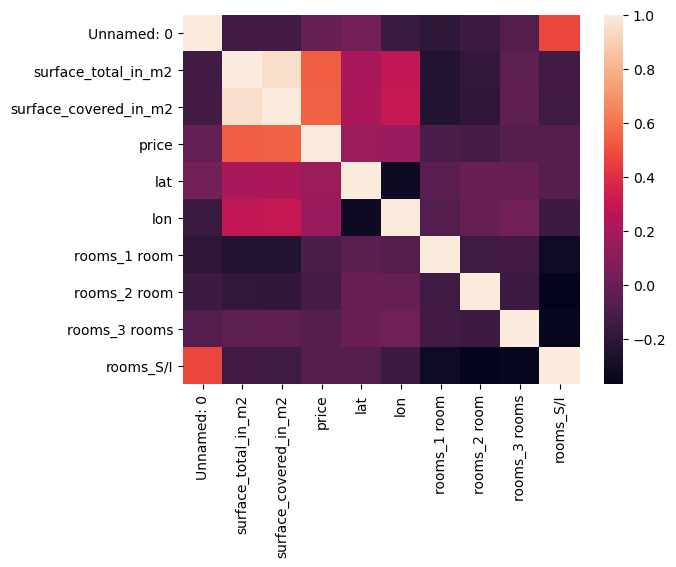

In [9]:
# Podemos ver a continuacion la matriz de correlacion representada como mapa de calor:

sns.heatmap(df_caba.corr())


In [10]:
X_3 = df_caba[['surface_total_in_m2', 'surface_covered_in_m2' ]]
y_3 = df_caba['price']


Xtrain_3, Xtest_3, ytrain_3, ytest_3 = train_test_split(X_3, y_3, random_state=123)
scaler = StandardScaler()

Xtrain_3 = scaler.fit_transform(Xtrain_3)
Xtest_3 = scaler.transform(Xtest_3)


# Tenemos que agregar explícitamente a una constante:
Xtrain_3 = sm.add_constant(Xtrain_3)
Xtest_3 = sm.add_constant(Xtest_3)

In [11]:
# Entrenamos el modelo 2 (con interaccion)

model_3 = sm.OLS(ytrain_3, Xtrain_3).fit()

display(model_3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     238.6
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.01e-88
Time:                        19:39:32   Log-Likelihood:                -18901.
No. Observations:                1274   AIC:                         3.781e+04
Df Residuals:                    1271   BIC:                         3.782e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.446e+05   1.88e+04     23.608      0.000    4.08e+05    4.82e+05
x1           2.05e+05   6.19e+04      3.311      0.001    8.35e+04    3.27e+05
x2          2.114e+05   6.19e+04      3.413      0.001    8.99e+04    3.33e+05
==============================================================================
Omnibus:                     1535.790   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126881.507
Skew:                           6.372   Prob(JB):                         0.00
Kurtosis:                      50.200   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
ypred_1 = model_1.predict(Xtest_1)

# Error cuadrático medio modelo 1
print("Error cuadrático medio modelo 1: %.2f" % mean_squared_error(ytest_1, ypred_1))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Puntaje de varianza modelo 1: %.2f' % r2_score(ytest_1, ypred_1))


Error cuadrático medio modelo 1: 94333630979.22
Puntaje de varianza modelo 1: 0.52


In [13]:
ypred_2 = model_2.predict(Xtest_2)

# Error cuadrático medio modelo 2
print("Error cuadrático medio modelo 2: %.2f" % mean_squared_error(ytest_2, ypred_2))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Puntaje de varianza modelo 2: %.2f' % r2_score(ytest_2, ypred_2))

Error cuadrático medio modelo 2: 92194302157.35
Puntaje de varianza modelo 2: 0.53


In [14]:
ypred_3 = model_3.predict(Xtest_3)

# Error cuadrático medio modelo 3
print("Error cuadrático medio modelo 3: %.2f" % mean_squared_error(ytest_3, ypred_3))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Puntaje de varianza modelo 3: %.2f' % r2_score(ytest_3, ypred_3))

Error cuadrático medio modelo 3: 93073271174.76
Puntaje de varianza modelo 3: 0.52
